### Data Dictionary

The Titanic was a British ocean liner that struck an iceberg and sunk on its maiden voyage in 1912 from the United Kingdom to New York. More than 1,500 of the estimated 2,224 passengers and crew died in the accident, making this one of the largest maritime disasters ever outside of war. The ship carried a wide range of passengers of all ages and both genders, from luxury travelers in first-class to immigrants in the lower classes. However, not all passengers were equally likely to survive the accident. You will use real data about a selection of 891 passengers to predict which passengers survived.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

from pycaret.classification import *


pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("titanicclean.csv")

In [3]:
df

,Survived,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked
0,0,male,3,22.0,7.2500,1,0,2,S
1,1,female,1,38.0,71.2833,1,0,2,C
2,1,female,3,26.0,7.9250,0,0,1,S
3,1,female,1,35.0,53.1000,1,0,2,S
4,0,male,3,35.0,8.0500,0,0,1,S
...,...,...,...,...,...,...,...,...,...
886,0,male,2,27.0,13.0000,0,0,1,S
887,1,female,1,19.0,30.0000,0,0,1,S
888,0,female,3,28.0,23.4500,1,2,4,S
889,1,male,1,26.0,30.0000,0,0,1,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Sex         891 non-null    object 
 2   Pclass      891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   FamilySize  891 non-null    int64  
 8   Embarked    889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [5]:
df.describe(include='all')

,Survived,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked
count,891.000000,891,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,889
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,S
freq,NaN,577,NaN,NaN,NaN,NaN,NaN,NaN,644
mean,0.383838,NaN,2.308642,29.361582,32.204208,0.523008,0.381594,1.904602,NaN
std,0.486592,NaN,0.836071,13.019697,49.693429,1.102743,0.806057,1.613459,NaN
min,0.000000,NaN,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,NaN
25%,0.000000,NaN,2.000000,22.000000,7.910400,0.000000,0.000000,1.000000,NaN
50%,0.000000,NaN,3.000000,28.000000,14.454200,0.000000,0.000000,1.000000,NaN
75%,1.000000,NaN,3.000000,35.000000,31.000000,1.000000,0.000000,2.000000,NaN


In [6]:
df.shape

(891, 9)

In [7]:
df.columns

Index(['Survived', 'Sex', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch',
       'FamilySize', 'Embarked'],
      dtype='object')

### Data Visualization

### Univariate Data Exploration

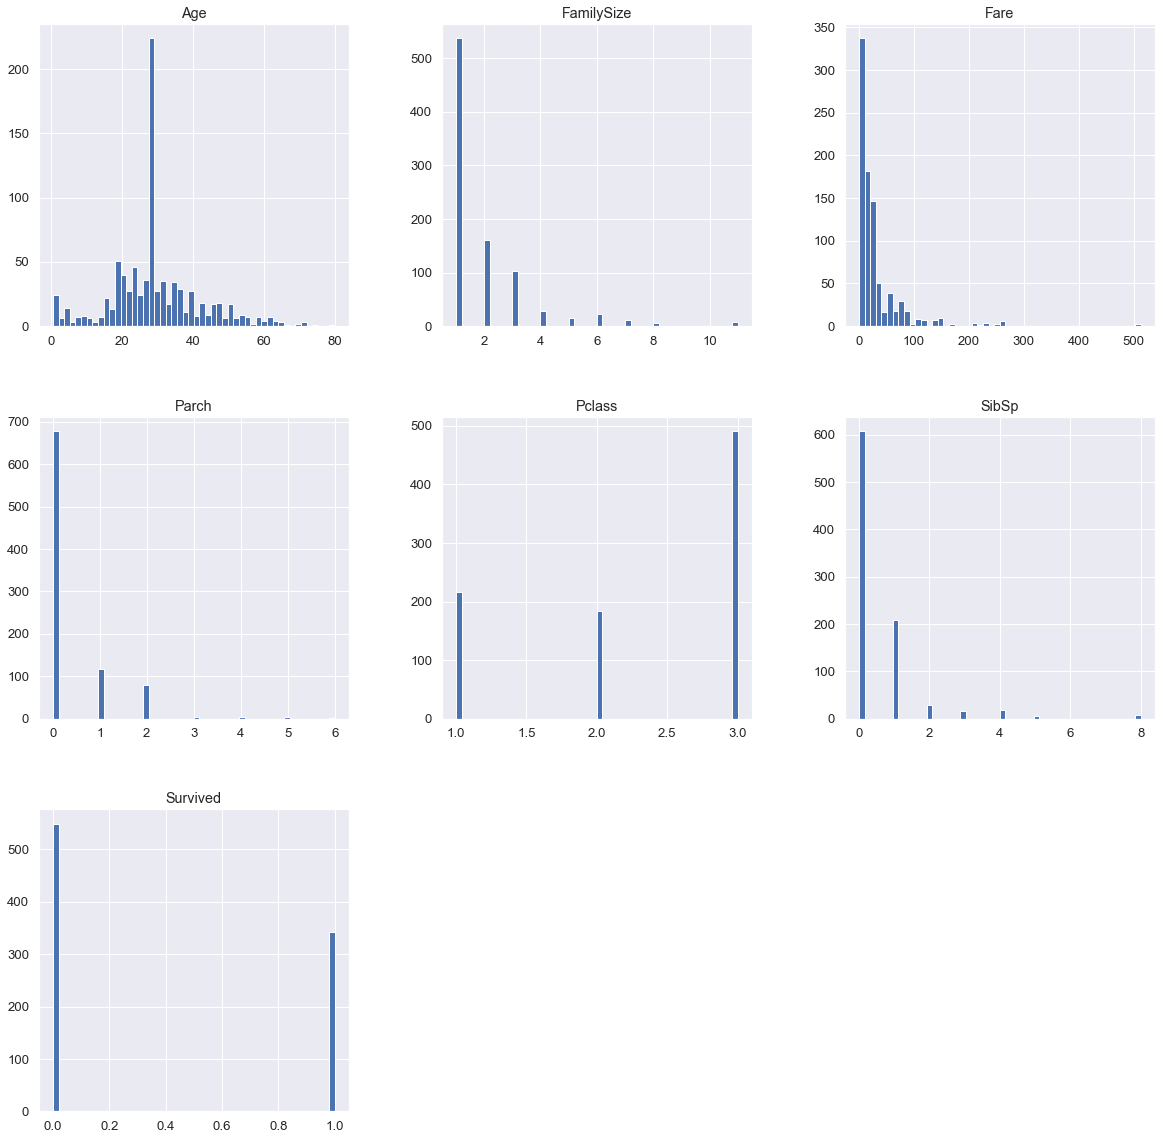

In [8]:
df.hist(bins=50, figsize=(20,20));

In [9]:
df.corr()

,Survived,Pclass,Age,Fare,SibSp,Parch,FamilySize
Survived,1.000000,-0.338481,-0.064910,0.257307,-0.035322,0.081629,0.016639
Pclass,-0.338481,1.000000,-0.339898,-0.549500,0.083081,0.018443,0.065997
Age,-0.064910,-0.339898,1.000000,0.096688,-0.233296,-0.172482,-0.245619
Fare,0.257307,-0.549500,0.096688,1.000000,0.159651,0.216225,0.217138
SibSp,-0.035322,0.083081,-0.233296,0.159651,1.000000,0.414838,0.890712
Parch,0.081629,0.018443,-0.172482,0.216225,0.414838,1.000000,0.783111
FamilySize,0.016639,0.065997,-0.245619,0.217138,0.890712,0.783111,1.000000


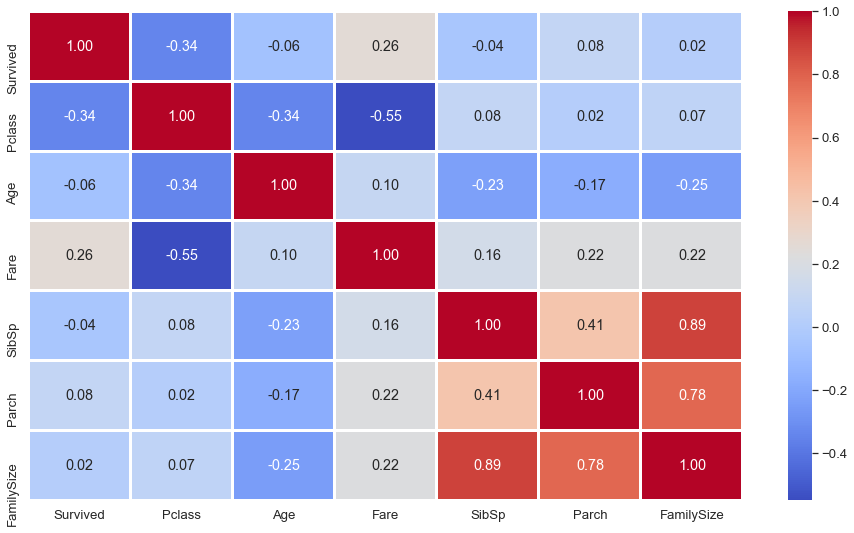

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [11]:
df.isnull().sum()

Survived      0
Sex           0
Pclass        0
Age           0
Fare          0
SibSp         0
Parch         0
FamilySize    0
Embarked      2
dtype: int64

In [12]:
#df.dropna(inplace=True)

### Treat Duplicate Values

In [13]:
#df.duplicated(keep='first').sum()

In [14]:
#df[df.duplicated(keep=False)]

In [15]:
#df.drop_duplicates(ignore_index=True, inplace=True)

In [16]:
#df

### Create and save processed dataset

In [17]:
#df.to_csv("",index=False)

### Question 3a: Predicting survival by sex

In [18]:
df

,Survived,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked
0,0,male,3,22.0,7.2500,1,0,2,S
1,1,female,1,38.0,71.2833,1,0,2,C
2,1,female,3,26.0,7.9250,0,0,1,S
3,1,female,1,35.0,53.1000,1,0,2,S
4,0,male,3,35.0,8.0500,0,0,1,S
...,...,...,...,...,...,...,...,...,...
886,0,male,2,27.0,13.0000,0,0,1,S
887,1,female,1,19.0,30.0000,0,0,1,S
888,0,female,3,28.0,23.4500,1,2,4,S
889,1,male,1,26.0,30.0000,0,0,1,C


In [19]:
df.columns

Index(['Survived', 'Sex', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch',
       'FamilySize', 'Embarked'],
      dtype='object')

In [20]:
df1 = df.drop(['Pclass', 'Age', 'Fare', 'SibSp', 'Parch',
       'FamilySize', 'Embarked'],axis=1)

In [21]:
df1

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


### Model Training

### Using PyCaret

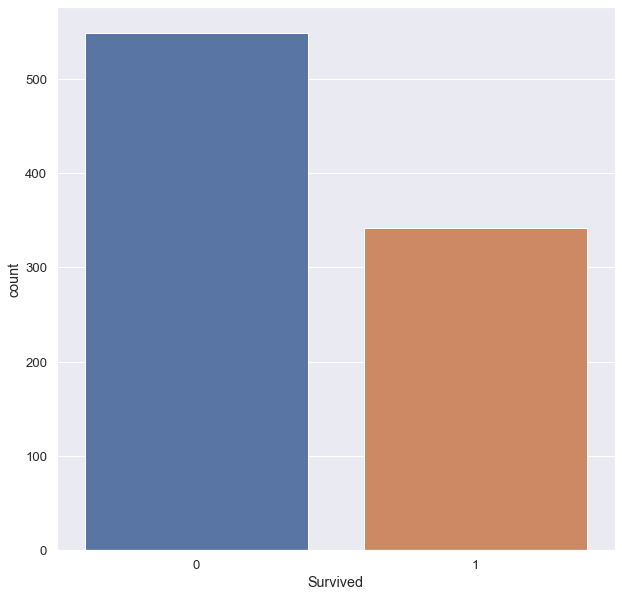

In [22]:
plt.figure(figsize=(10,10))
sns.countplot(x='Survived',data=df1);

In [23]:
exp_df1 = setup(data = df1, target = 'Survived', session_id=42, normalize=True, train_size=0.8) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 2)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [24]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.789300,0.770200,0.688500,0.749300,0.710000,0.546500
1,K Neighbors Classifier,0.789300,0.770200,0.688500,0.749300,0.710000,0.546500
2,Naive Bayes,0.789300,0.770200,0.688500,0.749300,0.710000,0.546500
3,Decision Tree Classifier,0.789300,0.770200,0.688500,0.749300,0.710000,0.546500
4,SVM - Linear Kernel,0.789300,0.000000,0.688500,0.749300,0.710000,0.546500
5,Ridge Classifier,0.789300,0.000000,0.688500,0.749300,0.710000,0.546500
6,Random Forest Classifier,0.789300,0.770200,0.688500,0.749300,0.710000,0.546500
7,Quadratic Discriminant Analysis,0.789300,0.770200,0.688500,0.749300,0.710000,0.546500
8,Ada Boost Classifier,0.789300,0.770200,0.688500,0.749300,0.710000,0.546500
9,Gradient Boosting Classifier,0.789300,0.770200,0.688500,0.749300,0.710000,0.546500


### Question 4a: Predicting survival by passenger class

In [25]:
df

,Survived,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked
0,0,male,3,22.0,7.2500,1,0,2,S
1,1,female,1,38.0,71.2833,1,0,2,C
2,1,female,3,26.0,7.9250,0,0,1,S
3,1,female,1,35.0,53.1000,1,0,2,S
4,0,male,3,35.0,8.0500,0,0,1,S
...,...,...,...,...,...,...,...,...,...
886,0,male,2,27.0,13.0000,0,0,1,S
887,1,female,1,19.0,30.0000,0,0,1,S
888,0,female,3,28.0,23.4500,1,2,4,S
889,1,male,1,26.0,30.0000,0,0,1,C


In [26]:
df2 = df.drop(['Embarked', 'Age', 'Fare', 'SibSp', 'Parch',
       'FamilySize', 'Sex'],axis=1)

In [27]:
df2

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3
...,...,...
886,0,2
887,1,1
888,0,3
889,1,1


In [28]:
exp_df2 = setup(data = df2, target = 'Survived', session_id=42, normalize=True, train_size=0.8) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 2)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [29]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.688200,0.685700,0.407000,0.649900,0.497700,0.290200
1,Decision Tree Classifier,0.688200,0.685700,0.407000,0.649900,0.497700,0.290200
2,Ridge Classifier,0.688200,0.000000,0.407000,0.649900,0.497700,0.290200
3,Random Forest Classifier,0.688200,0.685700,0.407000,0.649900,0.497700,0.290200
4,Ada Boost Classifier,0.688200,0.685700,0.407000,0.649900,0.497700,0.290200
5,Gradient Boosting Classifier,0.688200,0.685700,0.407000,0.649900,0.497700,0.290200
6,Linear Discriminant Analysis,0.688200,0.685700,0.407000,0.649900,0.497700,0.290200
7,Extra Trees Classifier,0.688200,0.685700,0.407000,0.649900,0.497700,0.290200
8,Extreme Gradient Boosting,0.688200,0.685700,0.407000,0.649900,0.497700,0.290200
9,Light Gradient Boosting Machine,0.688200,0.685700,0.407000,0.649900,0.497700,0.290200


### Question 4c: Predicting survival by passenger class

In [30]:
df

,Survived,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked
0,0,male,3,22.0,7.2500,1,0,2,S
1,1,female,1,38.0,71.2833,1,0,2,C
2,1,female,3,26.0,7.9250,0,0,1,S
3,1,female,1,35.0,53.1000,1,0,2,S
4,0,male,3,35.0,8.0500,0,0,1,S
...,...,...,...,...,...,...,...,...,...
886,0,male,2,27.0,13.0000,0,0,1,S
887,1,female,1,19.0,30.0000,0,0,1,S
888,0,female,3,28.0,23.4500,1,2,4,S
889,1,male,1,26.0,30.0000,0,0,1,C


In [31]:
df3 = df.drop(['Age', 'Fare', 'SibSp', 'Parch','FamilySize', 'Embarked'],axis=1)

In [32]:
df3

,Survived,Sex,Pclass
0,0,male,3
1,1,female,1
2,1,female,3
3,1,female,1
4,0,male,3
...,...,...,...
886,0,male,2
887,1,female,1
888,0,female,3
889,1,male,1


In [33]:
exp_df3 = setup(data = df3, target = 'Survived', session_id=42, normalize=True, train_size=0.8) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 3)"
4,Missing Values,False
5,Numeric Features,0
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [34]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.789300,0.837000,0.688500,0.749300,0.710000,0.546500
1,Ridge Classifier,0.789300,0.000000,0.688500,0.749300,0.710000,0.546500
2,Ada Boost Classifier,0.789300,0.837000,0.688500,0.749300,0.710000,0.546500
3,Linear Discriminant Analysis,0.789300,0.837000,0.688500,0.749300,0.710000,0.546500
4,K Neighbors Classifier,0.778100,0.806700,0.627400,0.795800,0.680100,0.515900
5,Random Forest Classifier,0.775300,0.837000,0.501700,0.889700,0.621200,0.482800
6,Decision Tree Classifier,0.769700,0.837000,0.567700,0.820700,0.639600,0.484200
7,Gradient Boosting Classifier,0.769700,0.837000,0.567700,0.820700,0.639600,0.484200
8,Extra Trees Classifier,0.769700,0.837000,0.567700,0.820700,0.639600,0.484200
9,Extreme Gradient Boosting,0.769700,0.837000,0.567700,0.820700,0.639600,0.484200


In [35]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7222,0.7557,0.5714,0.6667,0.6154,0.4000
1,0.8611,0.8856,0.8571,0.8000,0.8276,0.7115
2,0.7887,0.8260,0.6786,0.7600,0.7170,0.5493
3,0.7324,0.7782,0.4074,0.7857,0.5366,0.3740
4,0.8310,0.8712,0.8148,0.7586,0.7857,0.6465
5,0.7606,0.8426,0.7037,0.6786,0.6909,0.4956
6,0.8592,0.8662,0.7037,0.9048,0.7917,0.6878
7,0.7606,0.8586,0.7037,0.6786,0.6909,0.4956
8,0.8028,0.8338,0.6667,0.7826,0.7200,0.5693
9,0.7746,0.8523,0.7778,0.6774,0.7241,0.5352


In [36]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Question 8: Logistic regression models 

In [34]:
df

,Survived,Sex,Pclass,Age,Fare,SibSp,Parch,FamilySize,Embarked
0,0,male,3,22.0,7.2500,1,0,2,S
1,1,female,1,38.0,71.2833,1,0,2,C
2,1,female,3,26.0,7.9250,0,0,1,S
3,1,female,1,35.0,53.1000,1,0,2,S
4,0,male,3,35.0,8.0500,0,0,1,S
...,...,...,...,...,...,...,...,...,...
886,0,male,2,27.0,13.0000,0,0,1,S
887,1,female,1,19.0,30.0000,0,0,1,S
888,0,female,3,28.0,23.4500,1,2,4,S
889,1,male,1,26.0,30.0000,0,0,1,C


### Set the seed to 1. Train a logistic regression model with the caret glm method using all predictors. Ignore warnings about rank-deficient fit.

In [37]:
exp_df4 = setup(data = df, target = 'Survived', session_id=1, normalize=True, train_size=0.8) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(891, 9)"
4,Missing Values,True
5,Numeric Features,2
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [38]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.820200,0.879000,0.717700,0.806200,0.751800,0.612500
1,Logistic Regression,0.810300,0.863400,0.721200,0.774700,0.742000,0.593100
2,Extreme Gradient Boosting,0.809000,0.879500,0.681000,0.804400,0.731600,0.585500
3,Gradient Boosting Classifier,0.807600,0.882600,0.684700,0.802000,0.728800,0.582600
4,Linear Discriminant Analysis,0.807500,0.861600,0.702800,0.778700,0.734300,0.584800
5,Light Gradient Boosting Machine,0.804800,0.869700,0.707000,0.773600,0.733500,0.580700
6,Ridge Classifier,0.804700,0.000000,0.695400,0.775500,0.729000,0.577800
7,Ada Boost Classifier,0.799200,0.853200,0.743000,0.740500,0.738500,0.575900
8,SVM - Linear Kernel,0.785200,0.000000,0.717600,0.757700,0.720800,0.549100
9,Decision Tree Classifier,0.778200,0.775800,0.703300,0.718000,0.705000,0.528100


### Set the seed to 6. Train a kNN model on the training set

In [39]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7639,0.8531,0.8929,0.6410,0.7463,0.5364
1,0.8194,0.9091,0.7857,0.7586,0.7719,0.6226
2,0.7606,0.7699,0.5714,0.7619,0.6531,0.4759
3,0.6901,0.7542,0.5926,0.5926,0.5926,0.3426
4,0.8028,0.8279,0.6667,0.7826,0.7200,0.5693
5,0.7606,0.8506,0.6667,0.6923,0.6792,0.4883
6,0.7324,0.7521,0.5556,0.6818,0.6122,0.4112
7,0.8592,0.9213,0.8148,0.8148,0.8148,0.7012
8,0.8169,0.8283,0.7407,0.7692,0.7547,0.6087
9,0.7042,0.7652,0.5926,0.6154,0.6038,0.3680


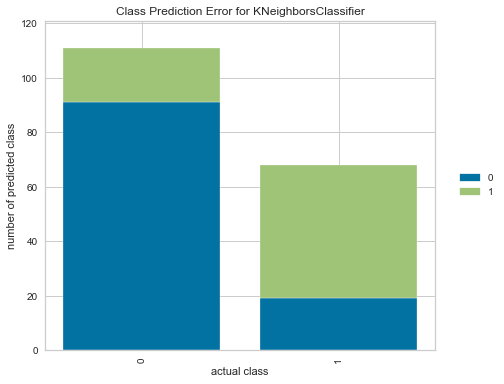

In [40]:
plot_model(knn,plot="error")

In [41]:
evaluate_model(knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Question 11a: Classification tree model 

In [42]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7917,0.8113,0.8929,0.6757,0.7692,0.5859
1,0.7083,0.6989,0.6786,0.6129,0.6441,0.3981
2,0.7324,0.7193,0.5357,0.7143,0.6122,0.4142
3,0.7324,0.7029,0.6296,0.6538,0.6415,0.4281
4,0.8028,0.8152,0.6296,0.8095,0.7083,0.5629
5,0.7746,0.7588,0.6296,0.7391,0.6800,0.5078
6,0.7887,0.7723,0.7037,0.7308,0.7170,0.5485
7,0.8592,0.8859,0.9259,0.7576,0.8333,0.7135
8,0.8310,0.8274,0.7778,0.7778,0.7778,0.6414
9,0.7606,0.7664,0.6296,0.7083,0.6667,0.4809


In [44]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Question 12: Random forest model

In [46]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7361,0.8405,0.8571,0.6154,0.7164,0.4818
1,0.7222,0.8373,0.5714,0.6667,0.6154,0.4000
2,0.7887,0.8501,0.5357,0.8824,0.6667,0.5252
3,0.6479,0.7344,0.5556,0.5357,0.5455,0.2583
4,0.8028,0.8287,0.6667,0.7826,0.7200,0.5693
5,0.7887,0.8316,0.6296,0.7727,0.6939,0.5351
6,0.8028,0.7643,0.6296,0.8095,0.7083,0.5629
7,0.7887,0.9200,0.7037,0.7308,0.7170,0.5485
8,0.7887,0.8598,0.7407,0.7143,0.7273,0.5550
9,0.7746,0.7849,0.6296,0.7391,0.6800,0.5078


In [47]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…